In [2]:
include("duales.jl")
include("integracion_taylor.jl")

Main.IntegTaylor

In [3]:
using .DifAutom, .IntegTaylor, Plots, TaylorSeries

In [4]:
function Lorentz!(du,u,p,t)
    du[1] = u[3]
    du[2] = u[4]
    du[3] = p[1]*(p[3](u[1],u[2],t)[1] + u[4]*p[4](u[1],u[2],t))/p[2]
    du[4] = p[1]*(p[3](u[1],u[2],t)[2] - u[3]*p[4](u[1],u[2],t))/p[2]
end

Lorentz! (generic function with 1 method)

In [260]:
E(x,y,t) = [1.0,0.0]

B(x,y,t) = 1*cos(0.05*t)

m = 1
q = 1
p =[q,m,E,B];

In [265]:
x0 =[1.0,0.0,0.0,0.0]

t_ini = 0.0

t_fin = 500.0

orden = 20

ϵ = 1e-20

t, x, error = integracion_taylor(Lorentz!, x0, t_ini, t_fin, orden, ϵ, p; Nt = 1000, longitud = false)

([0.0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5  …  495.94384691236655, 496.44384691236655, 496.94384691236655, 497.44384691236655, 497.94384691236655, 498.44384691236655, 498.94384691236655, 499.44384691236655, 499.94384691236655, 500.0], [[1.0, 0.0, 0.0, 0.0], [1.1224179181737346, -0.020572581202962136, 0.47943126673249287, -0.12239892494113778], [1.459726883727528, -0.15847556981298733, 0.8416421153815447, -0.45944783933667], [1.9295677371502862, -0.5021774365316249, 0.998650924449424, -0.9283489674669129], [2.4176610809509245, -1.089728373933902, 0.9134074371227537, -1.4145702583154687], [2.806049349325964, -1.8998882767900018, 0.6084351375497934, -1.800529194999818], [3.0018966066531925, -2.8579995844351265, 0.15941914729889728, -1.994587363035492], [2.9596490624253042, -3.8548691478957124, -0.3242990966287218, -1.9529793190856897], [2.691220461813151, -4.773673106514551, -0.7270274530949499, -1.6893407015970976], [2.262042464714174, -5.518038441300256, -0.9547231927964488, -1.

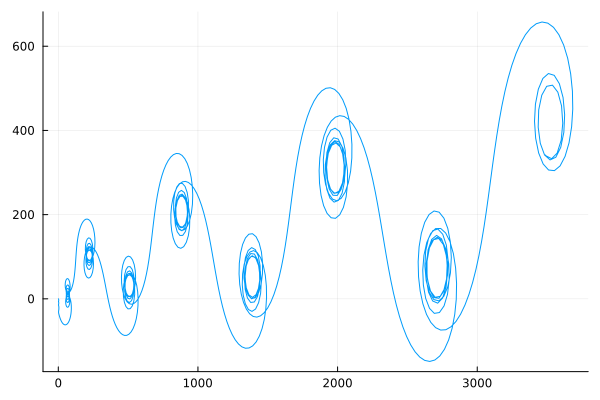

In [266]:
plot([(x[i][1],x[i][2]) for i in 1:length(x)], leg = false)

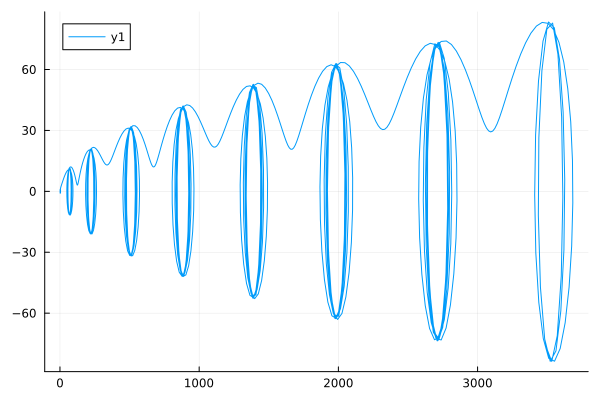

In [267]:
plot([(x[i][1],x[i][3]) for i in 1:length(x)])

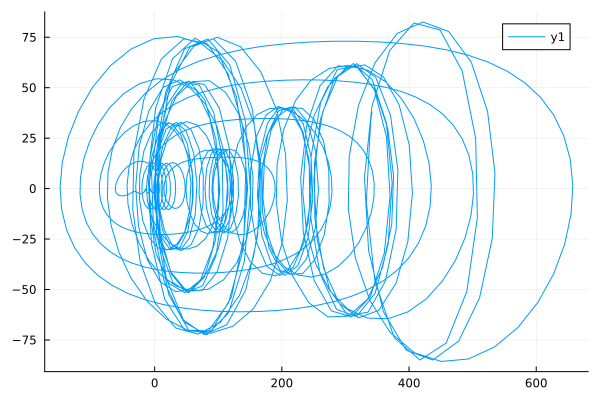

In [268]:
plot([(x[i][2],x[i][4]) for i in 1:length(x)])

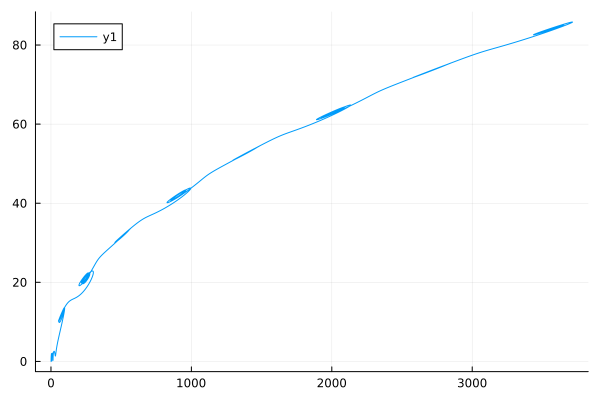

In [269]:
plot([(norm([x[i][1],x[i][2]]),norm([x[i][3],x[i][4]])) for i in 1:length(x)])